Mean:  68.4
Median:  69.5
Mode:  [59, 76, 49, 86, 19, 94, 62, 84, 63, 92]
Range:  75
Variance:  479.84
Standard Deviation:  21.905250512148907
Q1(Percentile):  59.75
Q3(Percentile):  85.5
IQR:  25.75
Skewness:  -0.8514564630078018
Kurtosis:  0.04263226399463527


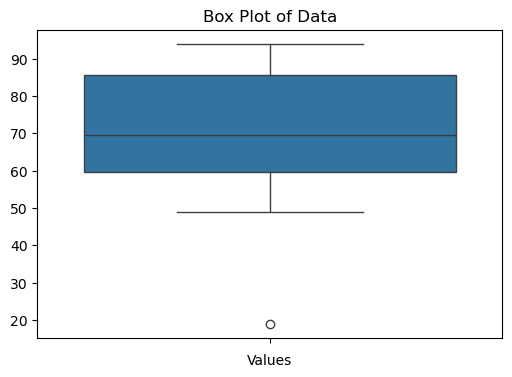

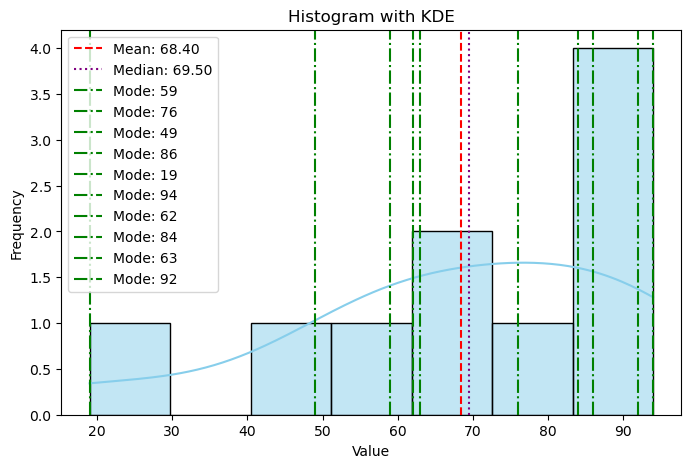

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = [59,76,49,86,19,94,62,84,63,92]
n = len(data)
sorted_data = sorted(data)

total = 0
for val in data:
    total += val
mean = total / n

if n%2 == 0:
    median = (sorted_data[n//2 - 1] + sorted_data[n//2]) / 2
else:
    median = sorted_data[n//2]

frequency = {}
for val in data:
    frequency[val] = frequency.get(val,0) + 1
max_freq = max(frequency.values())
mode = [k for k,v in frequency.items() if v == max_freq]

sqd_diffs = [(x-mean)**2 for x in data]
var = sum(sqd_diffs)/n
std_dev = var**0.5

mad = sum(abs(x-mean) for x in data) / n
cv = (std_dev/mean)*100

m3 = sum((x-mean)**3 for x in data) / n
skewness = m3/(std_dev**3)

m4 = sum((x-mean)**4 for x in data) / n
kurtosis = m4/(std_dev**4) - 3

def percentile(data,p):
    k = (len(data) - 1)*(p/100)
    f = int(k)
    c = k - f
    if f+1 < len(data):
        return data[f] + (data[f+1] - data[f]) * c
    else:
        return data[f]
    
q1 = percentile(sorted_data,25)
q3 = percentile(sorted_data,75)
iqr = q3 - q1

print("Mean: ",mean)
print("Median: ",median)
print("Mode: ",mode)
print("Range: ",max(data) - min(data))
print("Variance: ",var)
print("Standard Deviation: ",std_dev)
print("Q1(Percentile): ",q1)
print("Q3(Percentile): ",q3)
print("IQR: ",iqr)
print("Skewness: ",skewness)
print("Kurtosis: ",kurtosis)

# 1. Box Plot
plt.figure(figsize=(6, 4))
sns.boxplot(data=data)
plt.title("Box Plot of Data")
plt.xlabel("Values")
plt.show()

# 2. Histogram + KDE + Mean/Median/Mode
plt.figure(figsize=(8, 5))
sns.histplot(data, bins=7, kde=True, color='skyblue', edgecolor='black')
plt.axvline(mean, color='red', linestyle='--', label=f"Mean: {mean:.2f}")
plt.axvline(median, color='purple', linestyle=':', label=f"Median: {median:.2f}")
for m in mode:
    plt.axvline(m, color='green', linestyle='-.', label=f"Mode: {m}")
plt.title("Histogram with KDE")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()
